In [20]:
import os
import shutil

In [21]:
original_dataset_dir = '/Users/seino/Documents/res/09_DeepLearning/img/With_Gingiva/Mix/32'
base_dir = '/Users/seino/Documents/res/09_DeepLearning/playground/model/20190319/dataset'

In [22]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [23]:
import random

all_list = os.listdir(original_dataset_dir)
if '.DS_Store' in all_list:
    all_list.remove('.DS_Store')
random.shuffle(all_list)

In [24]:
train_fn = all_list[:20000]

for fn in train_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(train_dir, fn)
    shutil.copyfile(src, dst)

In [7]:
validation_fn = all_list[20000:25000]

for fn in validation_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(validation_dir, fn)
    shutil.copyfile(src, dst)

In [8]:
test_fn = all_list[25000:30000]

for fn in test_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(test_dir, fn)
    shutil.copyfile(src, dst)

In [25]:
from keras import layers
from keras import models
from keras import optimizers

In [26]:
height = 32
width = 32
channels = 3
num_classes = 32

model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(height, width, channels)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32, 32, 32)        128       
_________________________________________________________________
dense_10 (Dense)             (None, 32, 32, 32)        1056      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dense_11 (Dense)             (None, 16, 16, 32)        1056      
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
Total params: 3,296
Trainable params: 3,296
Non-trainable params: 0
_________________________________________________________________


In [34]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from encode import DataSet

callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='/Users/seino/Documents/res/09_DeepLearning/playground/model/20190319/log',
        histogram_freq=1, 
        embeddings_freq=1
    )
]

In [35]:
path = '/Users/seino/Documents/res/09_DeepLearning/playground/model/20190319/dataset/train'
ds = DataSet(path)
a = ds.img_list
b = ds.make_digit()
c = ds.k_hot_encode()
x_train, x_test, y_train, y_test = ds.like_mnist(b,c, 0.2)

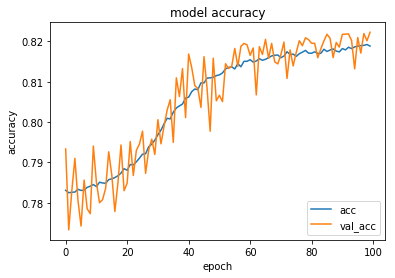

In [36]:
history = model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data = (x_test, y_test), verbose = 0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [37]:
tensorboard --logdir='/Users/seino/Documents/res/09_DeepLearning/playground/model/20190319/log'

SyntaxError: can't assign to operator (<ipython-input-37-4d301fa8db77>, line 1)